In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [2]:
#bring in csv of spot rates
spot_rates = pd.read_csv("spot_rates.csv")
spot_rates.head()

list_of_rates = ['AUJPYSP', 'AUUSDSP', 'AUGBPSP', 'AUMYRSP', 'AUEU.SP', 'AUNZDSP']

In [3]:
#get doy-on-day log returns of spot prices output into data frame 
spot_returns = pd.DataFrame()
for x in list_of_rates:
    #percentage returns commented below 
    #spot_returns[x + '_pct_return'] = spot_rates[x].pct_change()
    spot_returns[x + '_log_return'] = np.log(spot_rates[x]).diff()
    
spot_returns.columns = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
spot_returns.head(10)

,JPY,USD,GBP,MYR,EUR,NZD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014596,0.005757,-0.007325,0.007630,0.021320,0.007832
2,0.030557,0.020315,0.031631,0.022749,0.019120,0.001161
3,0.012901,0.001826,-0.008994,0.008404,0.025635,0.009160
4,0.021336,0.013801,-0.003909,0.011506,0.016794,-0.007007
5,-0.036838,-0.023392,-0.035673,-0.013711,-0.032135,-0.004976
6,-0.011709,0.001982,-0.005570,0.005084,0.001159,-0.008097
7,-0.035811,-0.023036,-0.016461,-0.014722,-0.004062,-0.010955
8,-0.028511,-0.019438,0.001528,-0.017495,-0.015035,0.021376
9,-0.003642,-0.005772,0.009549,-0.008157,-0.000394,0.007684


In [4]:
#create covarience matrix 
cov_matrix = spot_returns.cov()
cov_matrix

,JPY,USD,GBP,MYR,EUR,NZD
JPY,0.000081,0.000048,0.000030,0.000030,0.000032,0.000009
USD,0.000048,0.000051,0.000030,0.000032,0.000027,0.000007
GBP,0.000030,0.000030,0.000044,0.000021,0.000026,0.000008
MYR,0.000030,0.000032,0.000021,0.000032,0.000020,0.000006
EUR,0.000032,0.000027,0.000026,0.000020,0.000039,0.000009
NZD,0.000009,0.000007,0.000008,0.000006,0.000009,0.000021


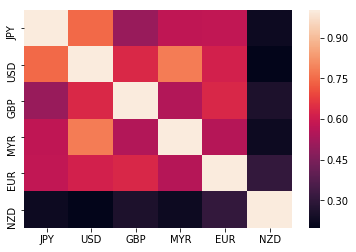

In [5]:
#correation matrix 
corr_matrix = spot_returns.corr()
corr_matrix

# plot the heatmap
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns);

In [6]:
Portfolio = pd.read_csv("spot_portfolio.csv")

In [7]:
Portfolio

,Currency,AUD equvalents,ABS value,p_weight
0,USD,20,20,0.148148
1,GBP,-15,15,0.111111
2,EUR,25,25,0.185185
3,JPY,-30,30,0.222222
4,NZD,25,25,0.185185
5,MYR,-20,20,0.148148


In [8]:
X_Vector = [-30000000, 20000000, -15000000, -20000000, 25000000, 25000000]

Covar_X = cov_matrix.dot(X_Vector)

X_Covar_X = Covar_X.dot(X_Vector)

X_Covar_X

58545599277.80732

In [9]:
sqrt_covar = np.sqrt(X_Covar_X)
sqrt_covar*1.645

398027.4554421197

In [10]:
np.mean(spot_returns['JPY'])

5.569086119784732e-05

In [11]:
curr = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']
mean_rets = {}
for x in curr:
    mean_rets[x] = np.mean(spot_returns[x])
    
mean_rets

{'JPY': 5.569086119784732e-05,
 'USD': -6.115685787646584e-06,
 'GBP': 5.774672615907859e-05,
 'MYR': 5.921647248838025e-05,
 'EUR': 8.077564935282384e-05,
 'NZD': -4.980751122065967e-05}

In [12]:
std_rets = {}
for x in curr:
    std_rets[x] = np.std(spot_returns[x])
    
std_rets

{'JPY': 0.009006444731635936,
 'USD': 0.007141994831460912,
 'GBP': 0.006652911018841816,
 'MYR': 0.005688550236269072,
 'EUR': 0.006215485106321001,
 'NZD': 0.00460082447983214}

In [55]:
np.random.seed(42)
n_sims = 100000
sim_returns = pd.DataFrame()
smean = {}
sim_std ={}

for x in curr:
    sim_returns[x] = np.random.normal(0, 1, n_sims)
    smean[x] = np.mean(sim_returns[x])
    sim_std[x] = np.std(sim_returns[x])

In [56]:
sim_returns.tail()

,JPY,USD,GBP,MYR,EUR,NZD
99995,-0.225225,-1.264548,-0.432314,-0.554456,1.333620,0.110642
99996,-0.569778,0.565654,-0.687466,-2.316381,-0.109756,-0.784152
99997,0.409185,0.160020,-0.679638,0.831556,-0.243695,-0.149473
99998,-0.211092,0.855673,-1.072092,0.462531,-0.797460,-0.088749
99999,0.120063,-1.064948,-0.357846,-0.137357,-1.641133,-0.037714


In [57]:
spot_price = {'JPY': 72.97, 'USD': 0.6812, 'GBP': 0.5625, 'MYR': 2.8290, 'EUR': 0.6148, 'NZD': 1.0419}
spot_price

{'JPY': 72.97,
 'USD': 0.6812,
 'GBP': 0.5625,
 'MYR': 2.829,
 'EUR': 0.6148,
 'NZD': 1.0419}

In [58]:
sim_spot_price = pd.DataFrame()
Curr_Vector = {'JPY':-30000000, 'USD':20000000, 'GBP':-15000000, 'MYR':-20000000, 'EUR':25000000, 'NZD':25000000}

for x in curr:
    sim_spot_price[x] = ((1 + sim_returns[x]) * Curr_Vector[x])

In [59]:
sim_spot_price['Portfolio'] = sim_spot_price['JPY'] + sim_spot_price['USD'] + sim_spot_price['GBP'] + sim_spot_price['MYR'] + sim_spot_price['EUR'] + sim_spot_price['NZD']

In [60]:
sim_spot_price['PnL'] = sim_spot_price['Portfolio'] - 5000000 #Mtm
sim_spot_price

,JPY,USD,GBP,MYR,EUR,NZD,Portfolio,PnL
0,-4.490142e+07,4.061189e+07,-3.842761e+07,7.996434e+06,1.008856e+08,-1.575621e+06,6.458931e+07,5.958931e+07
1,-2.585207e+07,-3.107095e+06,-1.358658e+07,-3.095646e+07,2.129754e+07,4.493702e+06,-4.771095e+07,-5.271095e+07
2,-4.943066e+07,3.150874e+07,4.943034e+06,-1.758475e+07,-1.829394e+07,4.208075e+07,-6.776824e+06,-1.177682e+07
3,-7.569090e+07,7.615231e+06,5.829572e+06,-1.433472e+07,3.787598e+07,3.544748e+07,-3.257359e+06,-8.257359e+06
4,-2.297540e+07,1.345194e+07,-9.860238e+06,-3.535138e+07,2.340647e+07,3.556146e+07,4.232853e+06,-7.671474e+05
5,-2.297589e+07,2.095209e+07,8.707797e+06,-1.130663e+07,2.893316e+07,1.284642e+07,3.715695e+07,3.215695e+07
6,-7.737638e+07,1.761018e+07,-2.380722e+07,-2.915466e+07,2.880877e+07,1.986047e+07,-6.405885e+07,-6.905885e+07
7,-5.302304e+07,-1.352211e+07,-1.797259e+07,-1.015450e+07,4.051308e+07,-7.460941e+06,-6.162010e+07,-6.662010e+07
8,-1.591577e+07,4.763624e+07,-1.574279e+07,-2.500558e+07,-7.510159e+06,7.999433e+07,6.345627e+07,5.845627e+07
9,-4.627680e+07,4.268818e+07,-5.709559e+06,-4.119872e+06,5.154123e+07,5.633459e+07,9.445777e+07,8.945777e+07


In [61]:
PnL = np.array(sim_spot_price['PnL'])
PnL.sort()

In [62]:
PnL[5000]

-93112933.19926977

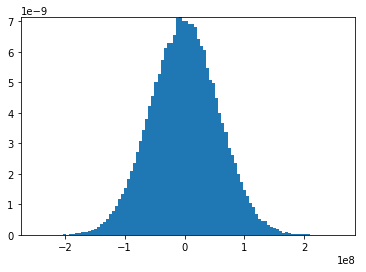

In [63]:
import matplotlib.pyplot as plt
x = PnL
plt.hist(x, normed=True, bins=100);

In [22]:
np.percentile(PnL, 5)

-648507.2484624723

In [48]:
hist_port_returns = pd.DataFrame()
for x in curr:
    hist_port_returns[x] = (1+spot_returns[x]) * Curr_Vector[x]
    
hist_port_returns.drop(hist_port_returns.index[0])
hist_port_returns.tail()

,JPY,USD,GBP,MYR,EUR,NZD
2757,-2.983254e+07,1.989604e+07,-1.502149e+07,-1.990119e+07,2.491156e+07,2.497123e+07
2758,-2.994397e+07,1.996233e+07,-1.525819e+07,-1.998173e+07,2.493952e+07,2.496879e+07
2759,-2.997996e+07,1.999710e+07,-1.496036e+07,-2.000703e+07,2.494342e+07,2.509829e+07
2760,-2.998797e+07,1.987486e+07,-1.494699e+07,-1.995707e+07,2.508079e+07,2.500239e+07
2761,-2.925290e+07,1.988582e+07,-1.493614e+07,-1.992872e+07,2.479347e+07,2.492573e+07


In [50]:
hist_port_returns['Portfolio'] = hist_port_returns['JPY'] + hist_port_returns['USD'] + hist_port_returns['GBP'] + hist_port_returns['MYR'] + hist_port_returns['EUR'] + hist_port_returns['NZD']

In [51]:
hist_port_returns['PnL'] = hist_port_returns['Portfolio'] - 5000000

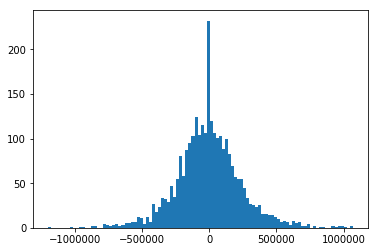

In [52]:
plt.hist(hist_port_returns['PnL'],  bins=100);

In [68]:
array = np.array(hist_port_returns['PnL'])
hist_port_returns['PnL'].to_excel (r'C:\Users\Mat\Documents\HS_port2_price.xlsx', index = None, header=True)

In [54]:
array = array[np.logical_not(np.isnan(array))]
np.percentile(array, 5)

-384873.90879832953

In [29]:
array[array <= np.percentile(array, 5)].mean()

-539006.5978053565

In [30]:
hist_port_returns['Log_returns'] = np.log(hist_port_returns['Portfolio']).diff()

In [31]:
hist_port_returns.loc[2: ,'Log_returns']

2      -0.276636
3       0.299286
4      -0.152726
5       0.158662
6      -0.059639
7       0.105798
8       0.029412
9      -0.135854
10      0.151894
11     -0.345819
12      0.045643
13      0.268281
14     -0.156638
15      0.001247
16      0.025626
17     -0.028682
18     -0.087589
19      0.130631
20      0.065314
21      0.046975
22     -0.037369
23     -0.240915
24      0.081820
25      0.124091
26     -0.127139
27     -0.168298
28      0.257185
29     -0.044429
30     -0.028686
31     -0.016163
          ...   
2732   -0.039495
2733    0.029181
2734   -0.040698
2735    0.006849
2736    0.049257
2737   -0.015131
2738    0.023873
2739    0.003594
2740   -0.030987
2741    0.026028
2742   -0.013933
2743   -0.017385
2744    0.013852
2745    0.018717
2746   -0.029332
2747    0.016812
2748   -0.023025
2749    0.011095
2750    0.017985
2751   -0.008036
2752   -0.019384
2753    0.032238
2754    0.026467
2755   -0.028627
2756   -0.029535
2757    0.022024
2758   -0.069410
2759    0.0828

In [32]:
hmean = np.mean(hist_port_returns.loc[2: ,'Log_returns'])
hstd = np.std(hist_port_returns.loc[2: ,'Log_returns'])
np.random.seed(42)
n_sims = 100000
hsim_returns = np.random.normal(hmean, hstd, n_sims)
hsmean  = np.mean(hsim_returns)
hsim_std = np.std(hsim_returns)

In [33]:
simVAR = 5000000*np.percentile(hsim_returns, 5) 
simVAR

-578217.0667840239

In [34]:
L = np.linalg.cholesky(cov_matrix)

In [35]:
L

array([[0.00900808, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.00534655, 0.00473719, 0.        , 0.        , 0.        ,
        0.        ],
       [0.00335038, 0.00258973, 0.00513279, 0.        , 0.        ,
        0.        ],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.        ,
        0.        ],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [36]:
np.array(sim_returns.loc[2, :])

array([ 0.00588906,  0.00410365, -0.00878754, -0.00062775, -0.01068294,
        0.00309361])

In [37]:
for r_index, row in enumerate(L):
    for c_index, col in enumerate(row):
        # ensures we're in the bottom half of the board
        if c_index <= len(L[0])/2 or r_index <= len(L)/2:
            L[r_index][c_index] = L[c_index][r_index]

In [38]:
L

array([[0.00900808, 0.00534655, 0.00335038, 0.00328318, 0.00360341,
        0.0010402 ],
       [0.00534655, 0.00473719, 0.00258973, 0.00298379, 0.0017267 ,
        0.00021023],
       [0.00335038, 0.00258973, 0.00513279, 0.0004111 , 0.00187957,
        0.00077107],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.00055656,
        0.00045162],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [39]:
yeet = []
yikes = []
for x in list(range(0,99998)):
    yikes = L.dot(np.array(sim_returns.loc[x, :]))
    yeet.append(yikes)
    yikes = []

In [40]:
ooft = pd.DataFrame(yeet)
ooft * X_Vector

,0,1,2,3,4,5
0,-4569.426481,1884.179920,-1746.077858,-429.155758,3162.398862,56.095073
1,1600.500757,-794.616320,472.696039,394.733547,-537.300340,-478.079583
2,-246.298581,169.993793,490.480008,-423.938642,-873.155426,151.427814
3,-2349.223678,606.221264,82.097715,-508.207417,952.668559,399.245805
4,693.320410,-295.581420,325.020443,-33.786715,-363.215915,141.259542
5,1746.969246,-846.611725,906.816405,380.526840,-580.630990,-510.183611
6,-4461.619392,1840.948689,-1023.277149,-1109.800616,1584.034843,382.907395
7,-67.904170,-371.330103,-15.303453,450.457521,564.442872,-471.796251
8,-88.576201,362.813271,-103.266139,-424.601882,-779.561901,922.457417
9,-2687.196772,1073.773084,-477.011494,-584.784630,1266.525750,775.688382


In [41]:
L

array([[0.00900808, 0.00534655, 0.00335038, 0.00328318, 0.00360341,
        0.0010402 ],
       [0.00534655, 0.00473719, 0.00258973, 0.00298379, 0.0017267 ,
        0.00021023],
       [0.00335038, 0.00258973, 0.00513279, 0.0004111 , 0.00187957,
        0.00077107],
       [0.00328318, 0.00298379, 0.0004111 , 0.00353837, 0.00055656,
        0.00045162],
       [0.00360341, 0.0017267 , 0.00187957, 0.00055656, 0.00434024,
        0.        ],
       [0.0010402 , 0.00021023, 0.00077107, 0.00045162, 0.00068153,
        0.00433429]])

In [42]:
sim_returns1 = pd.DataFrame()
for x in curr:
    sim_returns1[x] = np.random.normal(0, 1, n_sims)
    


In [64]:
outtest = []
out_row = []
for x in list(range(0,99998)):
    out_row = L.dot(np.array(sim_returns1.loc[x, :]))
    outtest.append(out_row)
    out_row = []
    
sim_returns = pd.DataFrame(outtest)

sim_returns

,0,1,2,3,4,5
0,0.020979,0.016889,0.000971,0.018442,0.000855,0.008883
1,-0.012632,-0.007086,-0.002991,-0.004880,-0.006939,-0.001903
2,-0.006310,-0.007675,-0.002124,-0.008203,0.001552,-0.003243
3,-0.011130,-0.008440,-0.006406,-0.004401,-0.003061,-0.002200
4,0.000601,-0.000544,0.003833,-0.001122,0.001469,0.006678
5,-0.009897,-0.008563,-0.006409,-0.004098,-0.005397,0.002521
6,0.004068,0.003571,0.003674,0.002282,0.000636,0.003248
7,-0.019000,-0.009823,-0.010311,-0.003932,-0.011913,-0.005479
8,0.017823,0.008313,0.010099,0.001678,0.014359,0.005117
9,0.012970,0.006553,0.001448,0.006317,0.007557,0.004776


In [66]:
sim_port = pd.DataFrame()
sim_port = (1 + sim_returns) * X_Vector
sim_port = jeeve

In [45]:
jeeve.columns = ['JPY', 'USD', 'GBP', 'MYR', 'EUR', 'NZD']

jeeve['Portfolio'] = jeeve['JPY'] + jeeve['USD'] + jeeve['GBP'] + jeeve['MYR'] + jeeve['EUR'] + jeeve['NZD']

jeeve['PnL'] = jeeve['Portfolio'] - 5000000 #Mtm

jeeve

,JPY,USD,GBP,MYR,EUR,NZD,Portfolio,PnL
0,-3.062938e+07,2.033778e+07,-1.501456e+07,-2.036884e+07,2.502138e+07,2.522207e+07,4.568456e+06,-431544.092548
1,-2.962103e+07,1.985828e+07,-1.495514e+07,-1.990241e+07,2.482653e+07,2.495243e+07,5.158662e+06,158661.722016
2,-2.981071e+07,1.984650e+07,-1.496815e+07,-1.983594e+07,2.503881e+07,2.491892e+07,5.189451e+06,189450.777725
3,-2.966610e+07,1.983120e+07,-1.490391e+07,-1.991198e+07,2.492347e+07,2.494499e+07,5.217664e+06,217663.556103
4,-3.001803e+07,1.998912e+07,-1.505750e+07,-1.997756e+07,2.503673e+07,2.516696e+07,5.139727e+06,139726.722835
5,-2.970308e+07,1.982873e+07,-1.490387e+07,-1.991804e+07,2.486508e+07,2.506303e+07,5.231851e+06,231850.845331
6,-3.012204e+07,2.007143e+07,-1.505511e+07,-2.004563e+07,2.501590e+07,2.508120e+07,4.945755e+06,-54244.909675
7,-2.943000e+07,1.980353e+07,-1.484533e+07,-1.992136e+07,2.470218e+07,2.486303e+07,5.172051e+06,172050.571873
8,-3.053470e+07,2.016627e+07,-1.515148e+07,-2.003355e+07,2.535897e+07,2.512793e+07,4.933431e+06,-66569.116098
9,-3.038911e+07,2.013105e+07,-1.502172e+07,-2.012634e+07,2.518892e+07,2.511941e+07,4.902200e+06,-97799.689096


-389755.4301424343

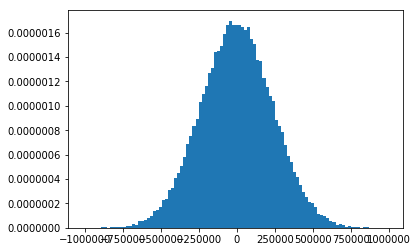

In [46]:
PnL2 = np.array(jeeve['PnL'])
PnL2.sort()
x = PnL2
plt.hist(x, normed=True, bins=100);
np.percentile(PnL2, 5)

In [47]:
PnL2[PnL2 <= np.percentile(PnL2, 5)].mean()

-488083.0311179883